<a href="https://colab.research.google.com/github/laienwu/WCS/blob/master/Scrapy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
from google.colab import drive
drive.mount('/content/gdrive')


Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
url="/content/gdrive/My Drive/Colab Notebooks/toto.json"
# df=pd.read_json(url)

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import re
import pandas as pd
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [ ]:
from google.colab import files
uploaded = files.upload()

In [ ]:
import io
df = pd.read_json(io.BytesIO(uploaded['toto.json']))


##import du .json résultat du scraping créé récolté avec scrapy

In [ ]:
df1=df.copy()
colonne=df1.columns.values.tolist()
df1.columns=[i.replace(' ','_').lower() for i in colonne]
col=['title_job', 'date_de_publication', 'job_description', 'job_info', 'competences_requises']
df1=df1[col]
df1.head()


,title_job,date_de_publication,job_description,job_info,competences_requises
0,\nData analyst H/F\n,\npostée il y a 3 jours\n,\nNotre client est une autorité administrative...,"[\nParis\n, \n40.000,00 € - 55.000,00 € / an\n]","[\nlinux\n, \npostgresql\n, \nruby\n, \nperl\n..."
1,\nData Analyst - Publicité\n,\npostée il y a 25 jours\n,\nL'entreprise récolte de la data via différen...,[\nParis\n],"[\nsql\n, \nt-sql\n, \noutils\n]"
2,Data Analyst BO/Qlick Sense (h/f)\n,\npostée il y a 19 jours\n,"\nFed IT, cabinet de recrutement spécialisé, r...","[\nMaisons Alfort\n, \n45.000,00 € - 50.000,00...","[\nsupport\n, \nsql\n, \ndata management\n, \n..."
3,Data Analyst / Chef de Projet BI (h/f)\n,\npostée il y a 1 mois\n,"\nFed IT, cabinet de recrutement spécialisé da...","[\nPARIS\n, \n60.000,00 € - 62.000,00 € / an\n]","[\ndata management\n, \nbusiness intelligence\..."
4,Portfolio Data Analyst H/F\n,\npostée il y a 7 jours\n,\nDescription de la mission\n \n Au sein de la...,[\nFrance\n],"[\noutils\n, \nsupport\n, \ndecisionnel\n, \ns..."


In [ ]:
#aaa = df.copy()
#aaa.competences_requises = aaa.competences_requises.apply(lambda x: [i.strip() for i in x])
#aaa

## Netoyage de la dataframe des "colonnes facile"
<p>-strip marqueurs <br>
-split des string inutiles <br>
-conversion des dtypes </p>


In [ ]:
df1 = df.copy()
df1['title_job']=[item.strip() for item in df1['title_job'].values]
df1['date_de_publication']=[i.strip() for i in df1['date_de_publication']]
df1.date_de_publication=df1.date_de_publication.apply(lambda x:' '.join(x.strip().split(' ')[-2:]))
df1['job_description']=[item.replace('\n', '') for item in df1['job_description'].values]
df1['job_info']=[list(map(lambda s: s.strip(), item))for item in df1['job_info']]
df1['competences_requises']=[list(map(lambda s: s.strip(), item))for item in df1['competences_requises']]
df1.competences_requises = df1.competences_requises.apply(lambda x: tuple(x))
df1.head()

,competences_requises,date_de_publication,job_description,job_info,title_job
0,"(linux, postgresql, ruby, perl, langage)",3 jours,Notre client est une autorité administrative i...,"[Paris, 40.000,00 € - 55.000,00 € / an]",Data analyst H/F
1,"(sql, t-sql, outils)",25 jours,L'entreprise récolte de la data via différente...,[Paris],Data Analyst - Publicité
2,"(support, sql, data management, business objec...",19 jours,"Fed IT, cabinet de recrutement spécialisé, rec...","[Maisons Alfort, 45.000,00 € - 50.000,00 € / an]",Data Analyst BO/Qlick Sense (h/f)
3,"(data management, business intelligence, bases...",1 mois,"Fed IT, cabinet de recrutement spécialisé dans...","[PARIS, 60.000,00 € - 62.000,00 € / an]",Data Analyst / Chef de Projet BI (h/f)
4,"(outils, support, decisionnel, sql, test)",7 jours,Description de la mission Au sein de la divis...,[France],Portfolio Data Analyst H/F


##2eme netoyage de la dataframe

-colonne job_info split dans 3colonnes: location, salaire_min, salaire_max pour faciliter le traitement<br>
avec les données extraites et converties sous les bon dtypes

In [ ]:
import numpy as np
tmp=df1['job_info'].values.tolist()
location=[item[0]for item in tmp]
salaire=[item[1] if len(item)==2 else np.nan for item in tmp]
df1['salaire']=salaire
df1['location']=location
df1=df1.drop('job_info',axis=1)
df_min_max = df1.salaire.str.extract('(?P<salaire_min>\d{0,3}\.\d{0,3}).*- (?P<salaire_max>\d{0,3}\.\d{0,3})', expand=True)
df_final = df1.join(df_min_max)
df_final.salaire_min = df_final.salaire_min.str.replace('.','').astype('float64')
df_final.salaire_max = df_final.salaire_max.str.replace('.','').astype('float64')
df_final.head()

,competences_requises,date_de_publication,job_description,title_job,salaire,location,salaire_min,salaire_max
0,"(linux, postgresql, ruby, perl, langage)",3 jours,Notre client est une autorité administrative i...,Data analyst H/F,"40.000,00 € - 55.000,00 € / an",Paris,40000.0,55000.0
1,"(sql, t-sql, outils)",25 jours,L'entreprise récolte de la data via différente...,Data Analyst - Publicité,NaN,Paris,NaN,NaN
2,"(support, sql, data management, business objec...",19 jours,"Fed IT, cabinet de recrutement spécialisé, rec...",Data Analyst BO/Qlick Sense (h/f),"45.000,00 € - 50.000,00 € / an",Maisons Alfort,45000.0,50000.0
3,"(data management, business intelligence, bases...",1 mois,"Fed IT, cabinet de recrutement spécialisé dans...",Data Analyst / Chef de Projet BI (h/f),"60.000,00 € - 62.000,00 € / an",PARIS,60000.0,62000.0
4,"(outils, support, decisionnel, sql, test)",7 jours,Description de la mission Au sein de la divis...,Portfolio Data Analyst H/F,NaN,France,NaN,NaN


In [ ]:
#col2=['title_job', 'date_de_publication', 'job_description', 'location','salaire', 'competences_requises']
#df2=df2[col2]

# df3=df2.salaire[~df2.salaire.isna()].values.tolist()
# toto = df3
# print(toto)
# a = re.match('(\d{0,3}\.\d{0,3}).*- (\d{0,3}\.\d{0,3})', '40.000,00 € - 55.000,00 € / an')
# res = []
# for i in toto:
#   try:
#     tmp = re.match('(\d{0,3}\.\d{0,3}).*- (\d{0,3}\.\d{0,3})', i)
#     res.append((tmp.group(1), tmp.group(2)))
#   except:
#     print("Regex not found : {}".format(i))


In [ ]:
df_final.head()

,competences_requises,date_de_publication,job_description,title_job,salaire,location,salaire_min,salaire_max
0,"(linux, postgresql, ruby, perl, langage)",3 jours,Notre client est une autorité administrative i...,Data analyst H/F,"40.000,00 € - 55.000,00 € / an",Paris,40000.0,55000.0
1,"(sql, t-sql, outils)",25 jours,L'entreprise récolte de la data via différente...,Data Analyst - Publicité,NaN,Paris,NaN,NaN
2,"(support, sql, data management, business objec...",19 jours,"Fed IT, cabinet de recrutement spécialisé, rec...",Data Analyst BO/Qlick Sense (h/f),"45.000,00 € - 50.000,00 € / an",Maisons Alfort,45000.0,50000.0
3,"(data management, business intelligence, bases...",1 mois,"Fed IT, cabinet de recrutement spécialisé dans...",Data Analyst / Chef de Projet BI (h/f),"60.000,00 € - 62.000,00 € / an",PARIS,60000.0,62000.0
4,"(outils, support, decisionnel, sql, test)",7 jours,Description de la mission Au sein de la divis...,Portfolio Data Analyst H/F,NaN,France,NaN,NaN


###Lecture, description, analyse et dataviz notament avec seaborn


In [ ]:
df_final.describe(include='all')


,competences_requises,date_de_publication,job_description,title_job,salaire,location,salaire_min,salaire_max
count,178,178,178,178,40,178,38.000000,38.000000
unique,174,30,131,170,23,49,NaN,NaN
top,"(data management, si, securité, outils, big data)",1 mois,"Créée en 2010, UniWare est une société de cons...",ALTERNANCE - Concepteur logiciel H/F,"40.000,00 € - 60.000,00 € / an",Paris,NaN,NaN
freq,2,24,16,3,7,46,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,46447.368421,62868.421053
std,NaN,NaN,NaN,NaN,NaN,NaN,10096.018397,11294.990644
min,NaN,NaN,NaN,NaN,NaN,NaN,30000.000000,45000.000000
25%,NaN,NaN,NaN,NaN,NaN,NaN,40000.000000,56250.000000
50%,NaN,NaN,NaN,NaN,NaN,NaN,45000.000000,60000.000000
75%,NaN,NaN,NaN,NaN,NaN,NaN,50000.000000,68750.000000


/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


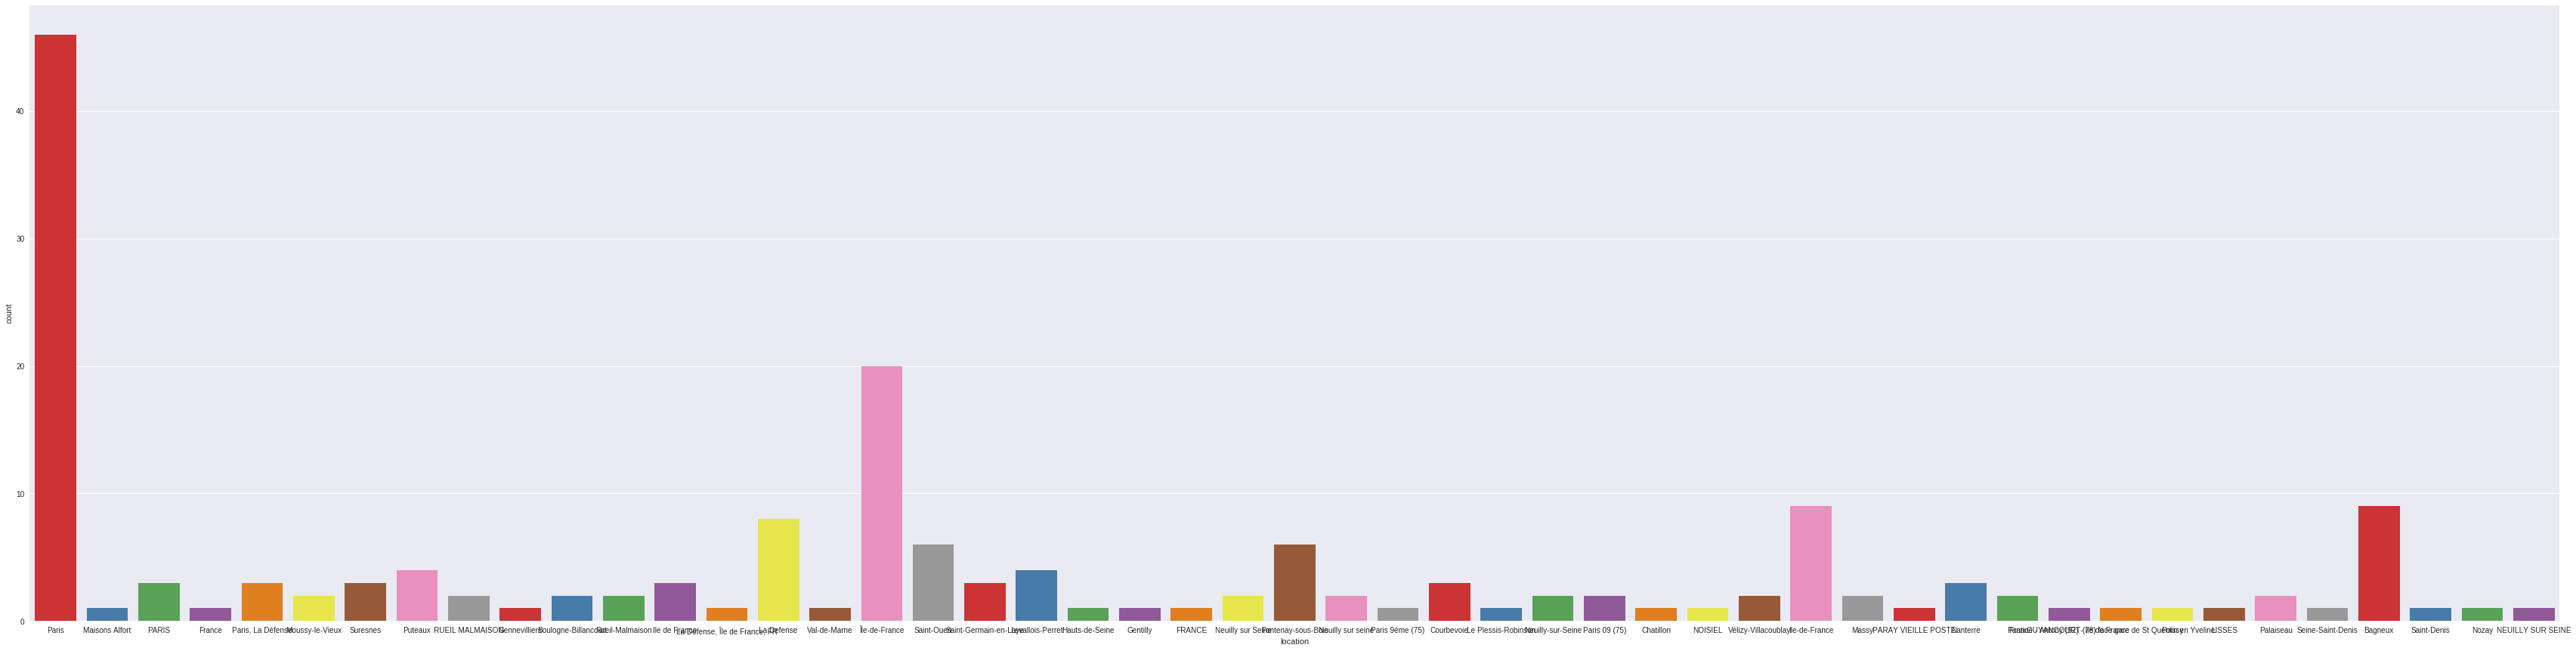

In [ ]:
#Barplot des différentes localisations
plt.figure(figsize=(60,15))
sns.countplot(x='location',data=df3,palette='Set1')

In [ ]:
df_final.salaire_max.dtypes

dtype('float64')

In [ ]:
tableau_Salaire=df_final[~df_final.salaire_max.isna()]
tableau_salaire_sorted=tableau_Salaire.sort_values(by=['salaire_max'],ascending=False)


/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


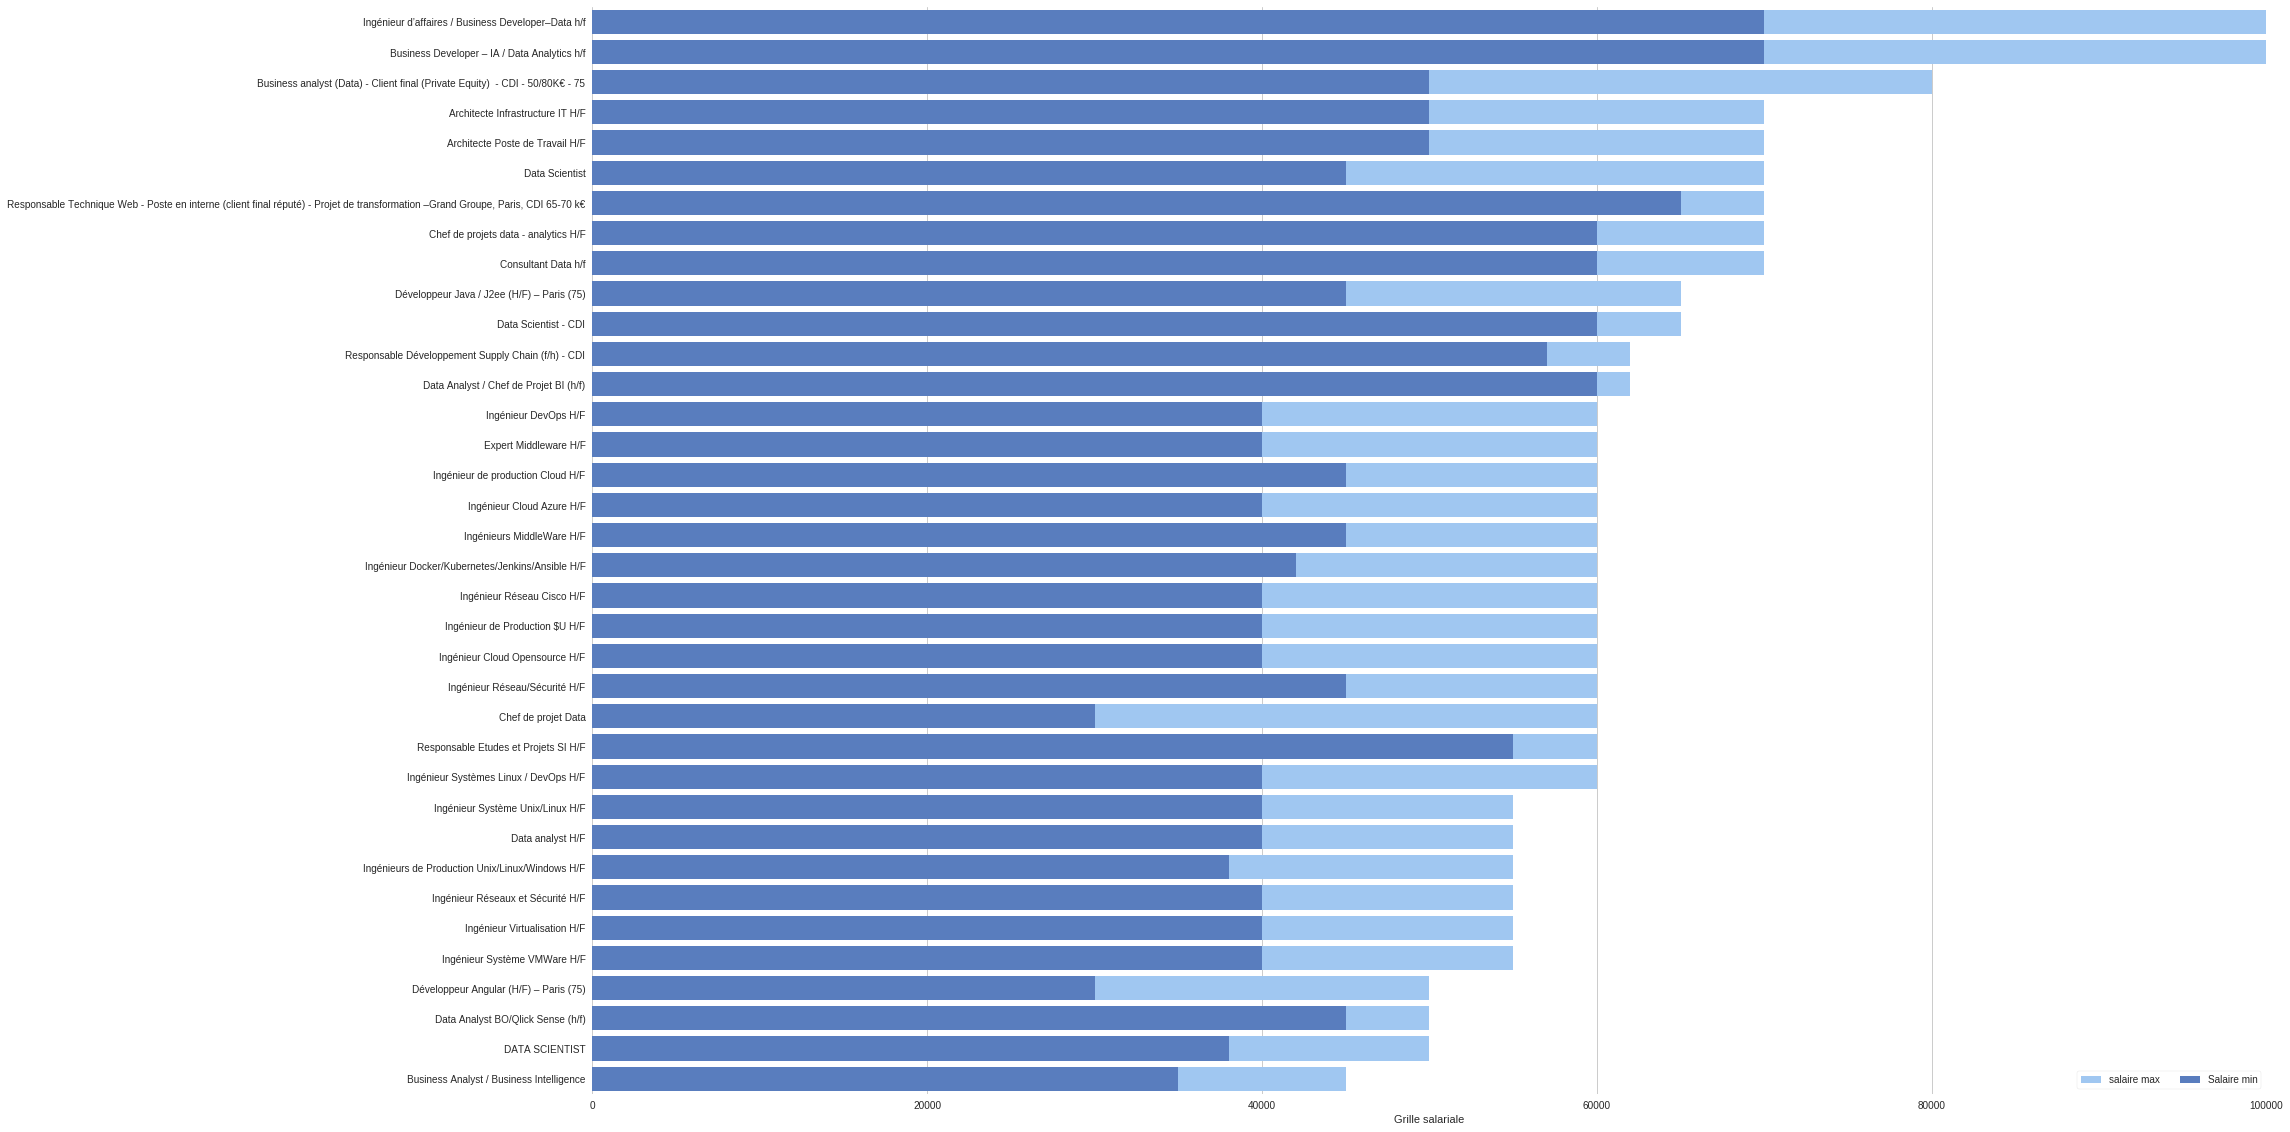

In [ ]:
sns.set(style="whitegrid")

f,ax=plt.subplots(figsize=(30,20))

sns.set_color_codes("pastel")
sns.barplot(x="salaire_max", y="title_job", data=tableau_salaire_sorted,
            label="salaire max", color="b")


sns.set_color_codes("muted")
sns.barplot(x="salaire_min", y="title_job", data=tableau_salaire_sorted,
            label="Salaire min", color="b")

ax.legend(ncol=2, loc="lower right", frameon=True)
ax.set(xlim=(0, 100000), ylabel="",
       xlabel="Grille salariale")
sns.despine(left=True, bottom=True)


([<matplotlib.patches.Wedge at 0x7f68e4af3438>,
 [Text(-0.572263446837974, -0.93942245417763, "Publiés moins d'un mois"),
  Text(0.6836683172301988, 0.8617410469599487, "Publiés depuis plus d'un mois"),
  Text(0.13555503351488227, 1.0916156983521168, 'Parutions du jour')],
 [Text(-0.31214369827525856, -0.5124122477332527, '82.6%'),
  Text(0.37290999121647206, 0.4700405710690629, '13.5%'),
  Text(0.07393910918993576, 0.5954267445557, '3.9%')])

<Figure size 2160x720 with 0 Axes>

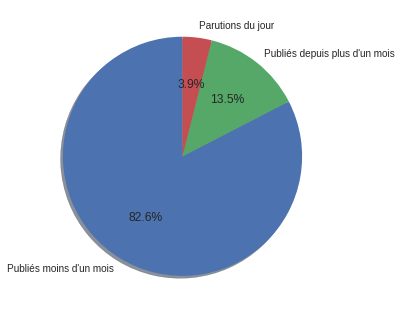

In [ ]:
import numpy as np
df_final['temps']=df_final.date_de_publication.apply(lambda x:''.join(x.split(' ')[-1]))
temps=df_final.temps.values.tolist()
temps
my_dict={}
for i in temps:
  if i in my_dict.keys():
    my_dict[i]+=1 
  else:
    my_dict[i]=1
vals = np.fromiter(my_dict.values(), dtype=int)
#my_dict={my_dict[i]+=1 if i in my_dict.keys() else my_dict[i]=1 for i in temps}
plt.figure(figsize=(30,10))
labels='Publiés moins d\'un mois','Publiés depuis plus d\'un mois','Parutions du jour'


fig1, ax1 = plt.subplots()
ax1.pie(vals, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)